In [1]:
!pip install albumentations

In [10]:
import random
import cv2
import numpy as np
import albumentations as A
from PIL import Image
import matplotlib.pyplot as plt

In [101]:
# Function to augment an image and return an augmented PIL image
def augment_img(img):

    img = np.asarray(img)  # Convert to numpy for OpenCV

    if len(img.shape) == 2:  # If the image is grayscale (2D array)
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    if img.shape[2] == 4:  # If the image has an alpha channel (4 channels)
        img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)  # Convert to RGB

    # Morphological alterations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
    if random.randint(1, 5) == 1:
        img = cv2.erode(img, kernel, iterations=random.randint(1, 2))
    if random.randint(1, 6) == 1:
        img = cv2.dilate(img, kernel, iterations=random.randint(1, 1))

    # Adjusted augmentation transformations
    transform = A.Compose([
        A.OneOf([
            A.OneOf([
                # Lowered brightness coefficient and reduced probability for less intense noise
                A.RandomRain(brightness_coefficient=0.90, drop_length=1, drop_width=1, drop_color=(0, 0, 0), blur_value=1, rain_type='drizzle', p=0.05),
                A.RandomShadow(p=0.3),  # Lowered probability
                A.PixelDropout(dropout_prob=0.1, drop_value=0, p=0.3),  # Reduced dropout probability
            ], p=0.7),  # Lowered overall probability for this group

            A.OneOf([
                A.PixelDropout(dropout_prob=0.1, drop_value=255, p=0.3),  # Reduced dropout probability
                A.RandomRain(brightness_coefficient=0.85, drop_length=1, drop_width=1, drop_color=(255, 255, 255), blur_value=1, rain_type=None, p=0.3),
            ], p=0.7),
        ], p=0.8),  # Reduced overall probability for noise effects

        A.OneOf([
            A.ShiftScaleRotate(shift_limit=0, scale_limit=0.05, rotate_limit=3, border_mode=cv2.BORDER_CONSTANT, value=(255, 255, 255), p=0.5),
            A.ShiftScaleRotate(shift_limit=0.03, scale_limit=0.03, rotate_limit=2, border_mode=cv2.BORDER_CONSTANT, value=(255, 255, 255), p=0.5),
            A.Affine(shear=random.randint(-1, 1), mode=cv2.BORDER_CONSTANT, cval=(255, 255, 255), p=0.5),
        ], p=0.4),  # Lowered the probability for geometric transformations
        A.Blur(blur_limit=(1, 3), p=0.2),  # Corrected blur limit to odd values
    ])

    # Apply augmentation
    img = transform(image=img)['image']

    #convert back to grayscale
    img =cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    image = Image.fromarray(img)  # Convert back to PIL image
    return image


In [87]:
# Function to generate 3 augmented versions of an image
def generate_augmented_images(img, num_augments=3):
    augmented_images = []
    for _ in range(num_augments):
        augmented_images.append(augment_img(img))
    return augmented_images

In [97]:
def convert_back_to_grayscale(augmented_images):
  new_aug=[]
  for img in augmented_images:
    img = np.asarray(img)
    gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    new_aug.append(gray_image)
  return new_aug

In [109]:
# Function to display original and augmented images side by side
def display_images_side_by_side(original_img, augmented_images):
    plt.figure(figsize=(15, 5))

    # Display the original image
    plt.subplot(1, len(augmented_images) + 1, 1)
    plt.imshow(original_img)
    plt.title("Original")
    plt.axis('off')

    # Display each augmented image
    for i, aug_img in enumerate(augmented_images):
        plt.subplot(1, len(augmented_images) + 1, i + 2)
        plt.imshow(aug_img,cmap='gray')
        plt.title(f"Augmented {i+1}")
        plt.axis('off')

    plt.show()

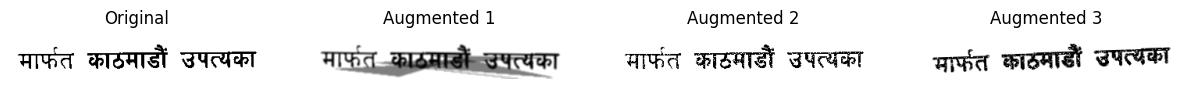

In [110]:
image_path = '/content/8.png'  # Replace with your image path
original_img = Image.open(image_path)  # Load the original image

# Generate 3 augmentations for the original image
augmented_images = generate_augmented_images(original_img, num_augments=3)
# augmented_grayscale_images = convert_back_to_grayscale(augmented_images)

# Display the original image and the augmented versions side by side
display_images_side_by_side(original_img, augmented_images)

In [108]:
counter =1
for img in augmented_images:
  name=f'/content/aug-{counter}.jpg'
  img.save(name)
  counter+=1

In [107]:
augmented_images


[<PIL.Image.Image image mode=L size=324x60>,
 <PIL.Image.Image image mode=L size=324x60>,
 <PIL.Image.Image image mode=L size=324x60>]